[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sample Data:
    review_id customer_name                                        review_text  \
0          1      John Doe  Love the camera quality, but the battery drain...   
1          2    Jane Smith  Great performance overall! Would like more col...   
2          3    Emily Shaw           App crashes sometimes, needs urgent fix.   
3          4     Raj Patel  Excellent value for money. Sound quality is good.   
4          5      Sara Kim      Didn't meet my expectations. Screen flickers.   

   rating   timestamp  
0       4  2024-03-20  
1       5  2024-03-21  
2       2  2024-03-22  
3       4  2024-03-23  
4       2  2024-03-24  

Sentiment Distribution:
 sentiment
positive    4
neutral     1
Name: count, dtype: int64


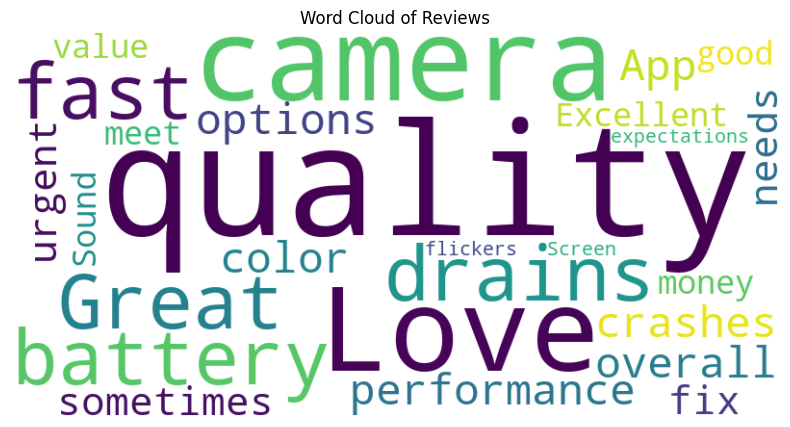

C:\Users\hp\AppData\Local\Temp\ipykernel_1728\2652800399.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="pastel")


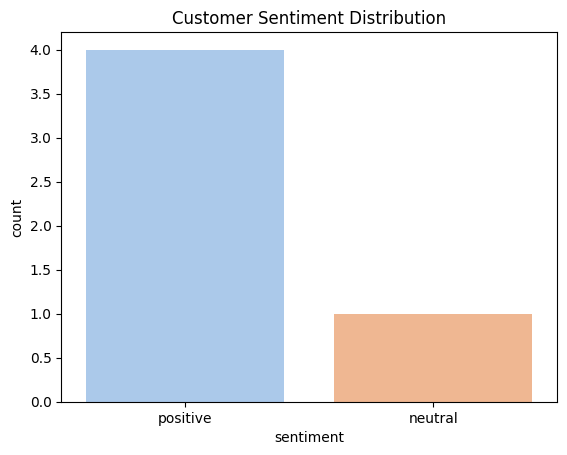

C:\Users\hp\AppData\Local\Temp\ipykernel_1728\2652800399.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=common_df, palette="viridis")


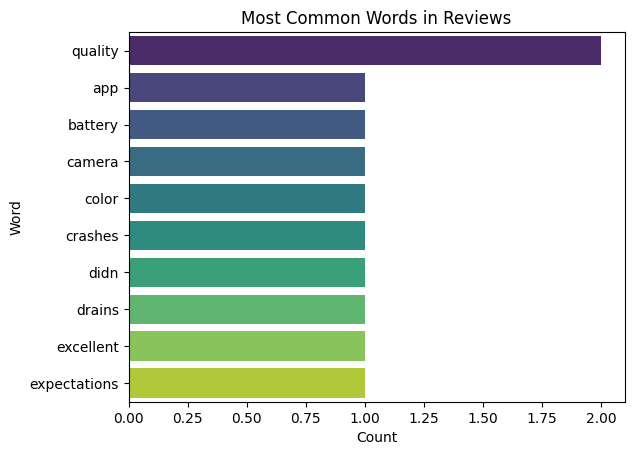

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('./customer_reviews.csv')

# Display sample
print("Sample Data:\n", df.head())

# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["review_text"].apply(lambda x: sid.polarity_scores(x)['compound'])
df["sentiment"] = df["sentiment_score"].apply(lambda x: "positive" if x >= 0.05 else ("negative" if x <= -0.05 else "neutral"))

# Show sentiment counts
print("\nSentiment Distribution:\n", df["sentiment"].value_counts())

# WordCloud for all reviews
all_text = " ".join(df["review_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# Plot sentiment counts
sns.countplot(x="sentiment", data=df, palette="pastel")
plt.title("Customer Sentiment Distribution")
plt.show()

# Most frequent words
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(df["review_text"])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_matrix.sum(axis=0).tolist()[0]))
common_words = Counter(word_freq).most_common(10)

common_df = pd.DataFrame(common_words, columns=["Word", "Count"])
sns.barplot(x="Count", y="Word", data=common_df, palette="viridis")
plt.title("Most Common Words in Reviews")
plt.show()
